<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%EB%94%A5%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

In [3]:
# 경로 설정, 매번 데이터를 다운로드하는 것이 아닌, 기존 데이터가 없으면 드라이브에 저장하는 방식입니다.
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/cifar10_data'  # CIFAR-10 데이터를 저장할 경로

# 데이터 디렉토리 생성
os.makedirs(DATA_DIR, exist_ok=True)

# --- CIFAR-10 로드 (자동으로 캐싱) ---
# Keras는 기본적으로 ~/.keras/datasets에 저장하지만,
# 명시적으로 경로를 지정하려면 아래와 같이 처리
cifar10_path = os.path.join(DATA_DIR,'cifar-10-batches-py')

if os.path.exists(cifar10_path):
    print(f"✓ 기존 데이터 발견: {cifar10_path}")
    print("저장된 데이터를 로드합니다...")
else:
    print(f"데이터가 없습니다. {DATA_DIR}에 다운로드합니다...")

데이터가 없습니다. /content/drive/MyDrive/Colab Notebooks/cifar10_data에 다운로드합니다...


In [4]:
#데이터 로드
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 클래스 이름 정의
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
# 사용할 클래스 선택
selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c)for c in selected_classes]
print(selected_idx)

[3, 5, 7]


In [8]:
# 선택한 클래스 필터링
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

In [9]:
#라벨을 0-2로 자시 재정의
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)]for y in y_train])
y_test = np.array([label_map[int(y)]for y in y_test])

/tmp/ipython-input-3096797891.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)]for y in y_train])
/tmp/ipython-input-3096797891.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)]for y in y_test])


In [10]:
# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
# CNN 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#모델 컴파일하기
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# 학습
model_cnn = model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=128, verbose=2)

Epoch 1/10
106/106 - 10s - 97ms/step - accuracy: 0.4781 - loss: 0.9961 - val_accuracy: 0.5293 - val_loss: 0.9215
Epoch 2/10
106/106 - 1s - 9ms/step - accuracy: 0.5803 - loss: 0.8567 - val_accuracy: 0.5913 - val_loss: 0.8295
Epoch 3/10
106/106 - 1s - 7ms/step - accuracy: 0.6116 - loss: 0.7922 - val_accuracy: 0.6027 - val_loss: 0.7886
Epoch 4/10
106/106 - 1s - 7ms/step - accuracy: 0.6404 - loss: 0.7535 - val_accuracy: 0.6467 - val_loss: 0.7764
Epoch 5/10
106/106 - 1s - 7ms/step - accuracy: 0.6594 - loss: 0.7205 - val_accuracy: 0.6700 - val_loss: 0.7343
Epoch 6/10
106/106 - 1s - 7ms/step - accuracy: 0.6820 - loss: 0.6898 - val_accuracy: 0.6733 - val_loss: 0.7166
Epoch 7/10
106/106 - 1s - 7ms/step - accuracy: 0.6973 - loss: 0.6552 - val_accuracy: 0.6813 - val_loss: 0.6896
Epoch 8/10
106/106 - 1s - 7ms/step - accuracy: 0.7092 - loss: 0.6388 - val_accuracy: 0.7040 - val_loss: 0.6649
Epoch 9/10
106/106 - 1s - 7ms/step - accuracy: 0.7309 - loss: 0.6035 - val_accuracy: 0.7007 - val_loss: 0.6636

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2%}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7153 - loss: 0.6523
Test accuracy: 71.97%


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,331 (579.42 KB)

 Trainable params: 49,443 (193.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 98,888 (386.29 KB)

65%-75%대의 정확도를 가지고 있습니다. CNN모델 구성을 수정해 shape를 1,1,32로 조정해도 비슷한 결과가 나옵니다. 따라서 현재 정확도를 개선하는데 있어 CNN의 구성을 수정하는 것은 큰 의미가 없다고 생각합니다.

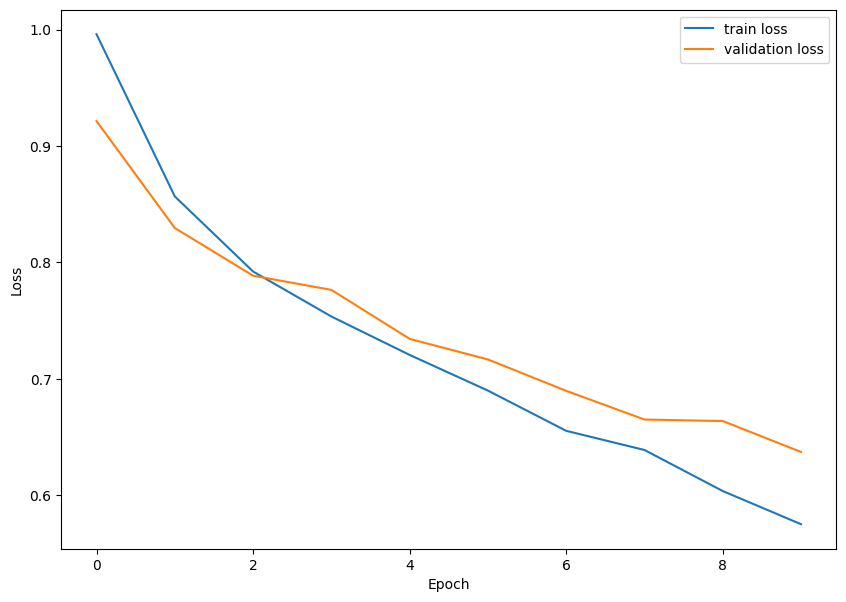

In [16]:
# loss 체크
import matplotlib.pyplot as plt

N_EPOCHS = 10 # 에포크 수 정의
history = model_cnn # 학습 히스토리 변수 사용

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

위 그래프에서 과적합 문제가 발생하여 아래 과적합 해결로 드롭 아웃을 실행한 모습입니다.  

그러나 위 그래프에 과적합 문제는 CNN모델에 출력 뉴런을 10개로 설정해서 생긴것 뿐입니다.  

지금도 그래프에 손실함수가 다시 위로 뜨는 문제가 있었지만 출력10개는 손실함수에 검증 데이터가 2.*대로 올라갔습니다.

In [17]:
# CNN 모델 구성 (드롭아웃 추가) - 새로운 모델
model_dropout = models.Sequential()
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Dropout(0.25)) # 드롭아웃 추가

model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Dropout(0.25)) # 드롭아웃 추가

model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))

model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(64, activation='relu'))
model_dropout.add(layers.Dropout(0.5)) # 드롭아웃 추가
model_dropout.add(layers.Dense(3, activation='softmax'))

#모델 컴파일하기
model_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
# 학습
model_dropout_cnn = model_dropout.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=128, verbose=2)

Epoch 1/10
106/106 - 11s - 105ms/step - accuracy: 0.4212 - loss: 1.0485 - val_accuracy: 0.4447 - val_loss: 1.0116
Epoch 2/10
106/106 - 1s - 8ms/step - accuracy: 0.5168 - loss: 0.9141 - val_accuracy: 0.5533 - val_loss: 0.8561
Epoch 3/10
106/106 - 1s - 7ms/step - accuracy: 0.5510 - loss: 0.8477 - val_accuracy: 0.5607 - val_loss: 0.8238
Epoch 4/10
106/106 - 1s - 7ms/step - accuracy: 0.5693 - loss: 0.8177 - val_accuracy: 0.5773 - val_loss: 0.7825
Epoch 5/10
106/106 - 1s - 7ms/step - accuracy: 0.5830 - loss: 0.8087 - val_accuracy: 0.6027 - val_loss: 0.7755
Epoch 6/10
106/106 - 1s - 9ms/step - accuracy: 0.6081 - loss: 0.7784 - val_accuracy: 0.6247 - val_loss: 0.7567
Epoch 7/10
106/106 - 1s - 9ms/step - accuracy: 0.6225 - loss: 0.7563 - val_accuracy: 0.6580 - val_loss: 0.7222
Epoch 8/10
106/106 - 1s - 9ms/step - accuracy: 0.6367 - loss: 0.7354 - val_accuracy: 0.6407 - val_loss: 0.7328
Epoch 9/10
106/106 - 1s - 8ms/step - accuracy: 0.6581 - loss: 0.7158 - val_accuracy: 0.6873 - val_loss: 0.686

In [19]:
test_loss, test_acc = model_dropout.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2%}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.6837
Test accuracy: 68.67%


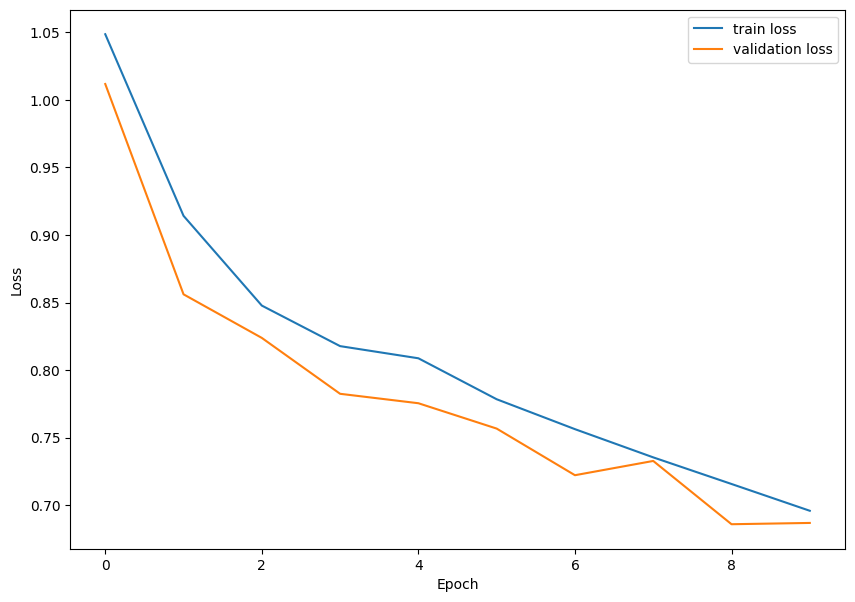

In [20]:
# loss 체크
import matplotlib.pyplot as plt

N_EPOCHS = 10
history = model_dropout_cnn # 새로운 모델 학습의 history 변수

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

드롭아웃 0.25, 0.5 에서는 0.6580, 0.6501으로 훈련이 끝났습니다.  
드롭아웃 0.1, 0.25 에서는 0.6152, 0.6412로 훈련이 끝났습니다.  
드롭아웃 0.05, 0.1 에서는 0.6158, 0.6656로 마지막에 loss값이 다시 높아졌습니다.

드롭아웃 적용전보다 검증 데이터 부분에서 손실함수가 개선되었습니다. 그러나 각 수치를 어느정도로 해야 최적에 성능이 나올지는 아직잘 모르겠습니다.  
여러번의 반복 결과 0.25, 0.5가 가장 과적합이 안정적으로 일어났습니다.


이번에는 정확도를 높여보겠습니다.  
우선 CNN 구조에서 1차원 벡터화 이후에 층을 늘려보겠습니다.

In [21]:
# CNN 모델 구성 (벡터화 이후 층 추가) - 새로운 모델
model_advenced = models.Sequential()
model_advenced.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_advenced.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_advenced.add(layers.MaxPooling2D((2, 2)))
model_advenced.add(layers.Dropout(0.25))

model_advenced.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_advenced.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_advenced.add(layers.MaxPooling2D((2, 2)))
model_advenced.add(layers.Dropout(0.25))

model_advenced.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_advenced.add(layers.Conv2D(32, (3, 3), activation='relu'))

model_advenced.add(layers.Flatten())
model_advenced.add(layers.Dense(64, activation='relu')) # 층을 추가로 투입
model_advenced.add(layers.Dropout(0.25))
model_advenced.add(layers.Dense(64, activation='relu'))
model_advenced.add(layers.Dropout(0.25))
model_advenced.add(layers.Dense(64, activation='relu'))
model_advenced.add(layers.Dense(3, activation='softmax'))

#모델 컴파일하기
model_advenced.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
# 학습
model_dropout_cnn = model_advenced.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=128, verbose=2)

Epoch 1/10
106/106 - 1s - 9ms/step - accuracy: 0.7271 - loss: 0.6154 - val_accuracy: 0.7333 - val_loss: 0.6001
Epoch 2/10
106/106 - 1s - 8ms/step - accuracy: 0.7444 - loss: 0.5853 - val_accuracy: 0.7367 - val_loss: 0.5932
Epoch 3/10
106/106 - 1s - 8ms/step - accuracy: 0.7513 - loss: 0.5783 - val_accuracy: 0.7560 - val_loss: 0.5689
Epoch 4/10
106/106 - 1s - 8ms/step - accuracy: 0.7520 - loss: 0.5695 - val_accuracy: 0.7533 - val_loss: 0.5670
Epoch 5/10
106/106 - 1s - 8ms/step - accuracy: 0.7653 - loss: 0.5534 - val_accuracy: 0.7580 - val_loss: 0.5636
Epoch 6/10
106/106 - 1s - 9ms/step - accuracy: 0.7667 - loss: 0.5436 - val_accuracy: 0.7573 - val_loss: 0.5575
Epoch 7/10
106/106 - 1s - 9ms/step - accuracy: 0.7746 - loss: 0.5290 - val_accuracy: 0.7673 - val_loss: 0.5548
Epoch 8/10
106/106 - 1s - 10ms/step - accuracy: 0.7857 - loss: 0.5125 - val_accuracy: 0.7713 - val_loss: 0.5537
Epoch 9/10
106/106 - 1s - 7ms/step - accuracy: 0.7809 - loss: 0.5105 - val_accuracy: 0.7660 - val_loss: 0.5580


In [25]:
test_loss, test_acc = model_advenced.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2%}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.5298
Test accuracy: 77.07%


정확도는 78%까지도 올라갔지만 반대로 66%가 나오는 등 근본적인 문제는 해결하지 못했습니다.